In [1]:
from DataPreparation import prepare_data, get_class_names
from TextRepresentationModel import bag_of_words, glove, sentence2vec
from Models import build_Conv1D, evolved_classifier, build_DNN, build_LSTM
from Evaluation import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import NearestCentroid

In [2]:
docs_train, docs_val, labels_train, labels_val = prepare_data("/work/final_dataset.csv", return_split=True)

## Modelos de aprendizado de máquina

In [ ]:
X_train, X_val = sentence2vec(docs_train, docs_val)

In [ ]:
classes = get_class_names(labels_train)

### Baseline - Nearest Centroid

In [ ]:
NearestCentroid_model = NearestCentroid()
NearestCentroid_model.fit(X_train, labels_train)

y_pred_val = NearestCentroid_model.predict(X_val)
y_pred_train = NearestCentroid_model.predict(X_train)

acc_train = accuracy_score(labels_train, y_pred_train)
acc_val = accuracy_score(labels_val, y_pred_val)

print("Acurácia no conjunto de treinamento: ", acc_train)
print("Acurácia no conjunto de validação: ", acc_val)

Acurácia no conjunto de treinamento:  0.7422222222222222
Acurácia no conjunto de validação:  0.736


### Regressão logística

In [ ]:
LogisticRegression_model = evolved_classifier(
    X_train, X_val, labels_val, labels_train,
    "LogisticRegression"
)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	15    	0.86163	0.0089401  	0.868889   	0.835111   
1  	11    	0.867526	0.00208126 	0.871111   	0.862667   
2  	2     	0.86883 	0.00185653 	0.871111   	0.864444   
3  	7     	0.869007	0.00306835 	0.873778   	0.860444   
4  	9     	0.868119	0.00278014 	0.871111   	0.863111   
5  	7     	0.868237	0.00338038 	0.871111   	0.862222   
6  	10    	0.868148	0.0023443  	0.871111   	0.864889   
7  	4     	0.869037	0.00270426 	0.871111   	0.863111   
8  	10    	0.867496	0.00296089 	0.871111   	0.863111   
9  	6     	0.868622	0.00263087 	0.871111   	0.864      
10 	6     	0.870015	0.00194656 	0.871556   	0.865778   
11 	5     	0.86883 	0.00383312 	0.871556   	0.859556   
12 	14    	0.865867	0.00211099 	0.871111   	0.862222   
13 	3     	0.866578	0.00156673 	0.871111   	0.863556   
14 	11    	0.866459	0.00258067 	0.871111   	0.861333   
15 	7     	0.867556	0.00200082 	0.871111   	0.863556   
16 	6     	0.86717 	0.0027487  	0.871111   	0.8617

In [ ]:
estimator = LogisticRegression_model.get_params()['estimator']

In [ ]:
pickle.dump(estimator, open("LogisticRegression_model.pkl", 'wb'))

In [ ]:
LogisticRegression_model = pickle.load(open('SVM_model.pkl', 'rb'))
LogisticRegression_params = LogisticRegression_model.get_params()

In [ ]:
y_pred_val = LogisticRegression_model.predict(X_val)
y_pred_train = LogisticRegression_model.predict(X_train)

acc_train = accuracy_score(labels_train, y_pred_train)
acc_val = accuracy_score(labels_val, y_pred_val)

print("Acurácia no conjunto de treinamento: ", acc_train)
print("Acurácia no conjunto de validação: ", acc_val)
print(f"Hiperâmetros otimizados => C: {round(LogisticRegression_params['C'], 3)}")

Acurácia no conjunto de treinamento:  0.9906666666666667
Acurácia no conjunto de validação:  0.908
Hiperâmetros otimizados => C: 3.733


### Máquina de suporte vetorial (SVM)

In [ ]:
SVM_model = evolved_classifier(
    X_train, X_val, labels_val, labels_train,
    "SVC"
)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.860296	0.0276965  	0.879111   	0.774667   
1  	10    	0.857511	0.0387222  	0.882222   	0.752444   
2  	12    	0.870933	0.0245607  	0.897778   	0.783111   
3  	6     	0.872207	0.0377172  	0.897778   	0.735111   
4  	7     	0.885807	0.00912208 	0.897778   	0.872      
5  	13    	0.89197 	0.00709158 	0.899111   	0.873333   
6  	10    	0.895941	0.00262619 	0.899111   	0.890222   
7  	10    	0.884889	0.0443706  	0.9        	0.719111   
8  	11    	0.884593	0.0447761  	0.899556   	0.717778   
9  	4     	0.885037	0.0481774  	0.899556   	0.704889   
10 	2     	0.898637	0.00126196 	0.899556   	0.894667   
11 	10    	0.897304	0.00168238 	0.899556   	0.893778   
12 	5     	0.896119	0.00524988 	0.899556   	0.878222   
13 	6     	0.897867	0.00182313 	0.900889   	0.894222   
14 	10    	0.88477 	0.0361977  	0.900889   	0.752444   
15 	10    	0.897896	0.00244763 	0.902222   	0.894222   
16 	6     	0.899585	0.00321915 	0.902667   	0.89

In [ ]:
estimator = SVM_model.get_params()['estimator']

In [ ]:
with open("SVM_model.pkl", 'wb') as model_file:
    pickle.dump(estimator, model_file)

In [ ]:
SVM_model = pickle.load(open('SVM_model.pkl', 'rb'))

In [ ]:
SVM_params = SVM_model.get_params()

In [ ]:
y_pred_val = SVM_model.predict(X_val)
y_pred_train = SVM_model.predict(X_train)

acc_train = accuracy_score(labels_train, y_pred_train)
acc_val = accuracy_score(labels_val, y_pred_val)

print("Acurácia no conjunto de treinamento: ", acc_train)
print("Acurácia no conjunto de validação: ", acc_val)
print(f"Hiperâmetros otimizados => C: {round(SVM_params['C'], 3)}, gamma: {round(SVM_params['gamma'], 3)}, kernel: {SVM_params['kernel']}")

Acurácia no conjunto de treinamento:  0.9906666666666667
Acurácia no conjunto de validação:  0.908
Hiperâmetros otimizados => C: 3.733, gamma: 1.022, kernel: rbf


In [ ]:
dummy_labels = pd.get_dummies(labels_val, drop_first=False).values
y_prob = SVM_model.predict_proba(X_val)

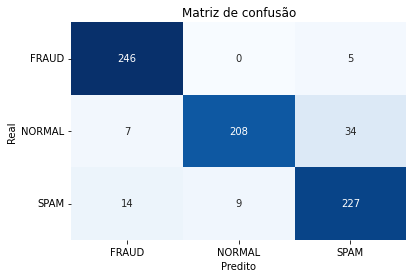

In [ ]:
plot_confusion_matrix(labels_val, y_pred_val, classes)

In [ ]:
print(classification_report(y_true=labels_val, y_pred=y_pred_val, target_names=classes))

              precision    recall  f1-score   support

       FRAUD       0.92      0.98      0.95       251
      NORMAL       0.96      0.84      0.89       249
        SPAM       0.85      0.91      0.88       250

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750



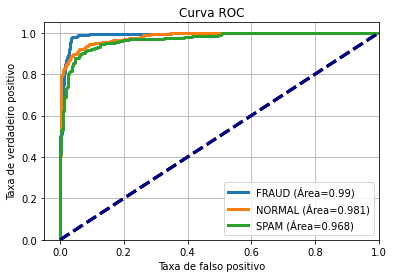

In [ ]:
plot_roc_curve(dummy_labels, y_prob, classes)

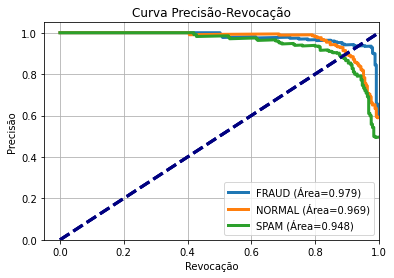

In [ ]:
plot_precision_recall_curve(dummy_labels, y_prob, classes)

## Modelos de aprendizado profundo

In [3]:
vocab_size = 1000
maxlen = 1000

In [4]:
embedding_matrix = glove(docs_train, docs_val, vocab_size, maxlen, return_weights=True)

In [5]:
X_train, X_val = glove(docs_train, docs_val, vocab_size, maxlen, return_weights=False)

### Rede Neural Profunda

In [ ]:
hidden_dims = 48
dropout_rate = 0.4
epochs=10
batch_size=32

In [ ]:
DNN_model = build_DNN(
    vocab_size,
    maxlen,
    embedding_matrix,
    hidden_dims,
    dropout_rate
)

In [ ]:
DNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         100000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000, 48)          4848      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 48000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 48)                2304048   
_________________________________________________________________
dropout_5 (Dropout)          (None, 48)               

In [ ]:
DNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [ ]:
history = DNN_model.fit(
    X_train,
    labels_train, 
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, labels_val)
)

Epoch 1/30
71/71 [==============================] - 8s 106ms/step - loss: 0.4785 - accuracy: 0.8342 - val_loss: 0.1275 - val_accuracy: 0.9760
Epoch 2/30
71/71 [==============================] - 8s 108ms/step - loss: 0.1387 - accuracy: 0.9700 - val_loss: 0.1156 - val_accuracy: 0.9747
Epoch 3/30
71/71 [==============================] - 7s 106ms/step - loss: 0.0930 - accuracy: 0.9762 - val_loss: 0.1106 - val_accuracy: 0.9733
Epoch 4/30
71/71 [==============================] - 10s 148ms/step - loss: 0.0804 - accuracy: 0.9845 - val_loss: 0.1235 - val_accuracy: 0.9733
Epoch 5/30
71/71 [==============================] - 7s 105ms/step - loss: 0.0508 - accuracy: 0.9907 - val_loss: 0.1223 - val_accuracy: 0.9720
Epoch 6/30
71/71 [==============================] - 8s 120ms/step - loss: 0.0433 - accuracy: 0.9935 - val_loss: 0.1431 - val_accuracy: 0.9680
Epoch 7/30
71/71 [==============================] - 7s 105ms/step - loss: 0.0372 - accuracy: 0.9913 - val_loss: 0.1628 - val_accuracy: 0.9693
Epoch

In [ ]:
DNN_model.save("DNN_model.h5")

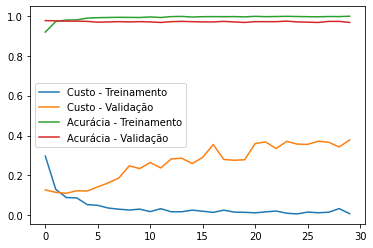

In [ ]:
plt.plot(history.history['loss'], label='Custo - Treinamento')
plt.plot(history.history['val_loss'], label='Custo - Validação')
plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
plt.legend()
plt.show()

### Rede Neural Convolucional 1D

In [ ]:
batch_size = 32
filters = 100
kernel_size = 3
hidden_dims = 48
epochs = 10

In [ ]:
Conv1D_model = build_Conv1D(
    vocab_size,
    maxlen,
    embedding_matrix,
    filters,
    kernel_size,
    hidden_dims
)

In [ ]:
Conv1D_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         100000    
_________________________________________________________________
dropout (Dropout)            (None, 1000, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 998, 100)          30100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 499, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 497, 100)          30100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 248, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 246, 100)          3

In [ ]:
Conv1D_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [ ]:
history = Conv1D_model.fit(
    X_train,
    labels_train, 
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, labels_val)
)

Epoch 1/10
71/71 [==============================] - 45s 634ms/step - loss: 1.1132 - accuracy: 0.4063 - val_loss: 0.9246 - val_accuracy: 0.5480
Epoch 2/10
71/71 [==============================] - 18s 250ms/step - loss: 0.8772 - accuracy: 0.5693 - val_loss: 0.9233 - val_accuracy: 0.4427
Epoch 3/10
71/71 [==============================] - 18s 251ms/step - loss: 0.8248 - accuracy: 0.5895 - val_loss: 0.8525 - val_accuracy: 0.6547
Epoch 4/10
71/71 [==============================] - 21s 293ms/step - loss: 0.7878 - accuracy: 0.6216 - val_loss: 0.7739 - val_accuracy: 0.6693
Epoch 5/10
71/71 [==============================] - 38s 543ms/step - loss: 0.7401 - accuracy: 0.6612 - val_loss: 0.7161 - val_accuracy: 0.6907
Epoch 6/10
71/71 [==============================] - 77s 1s/step - loss: 0.7635 - accuracy: 0.6495 - val_loss: 0.7072 - val_accuracy: 0.6800
Epoch 7/10
71/71 [==============================] - 18s 255ms/step - loss: 0.7542 - accuracy: 0.6746 - val_loss: 0.6503 - val_accuracy: 0.7107
Ep

In [ ]:
Conv1D_model.save("Conv1D_model.h5")

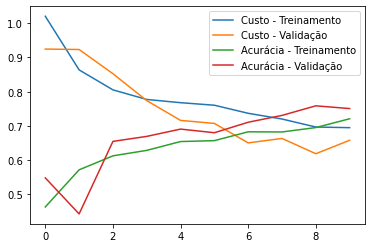

In [ ]:
plt.plot(history.history['loss'], label='Custo - Treinamento')
plt.plot(history.history['val_loss'], label='Custo - Validação')
plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
plt.legend()
plt.show()

### LSTM

In [6]:
hidden_dims = 48
epochs = 10
batch_size = 32

In [7]:
LSTM_model = build_LSTM(
    vocab_size,
    maxlen,
    embedding_matrix,
    hidden_dims
)

In [8]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 48)                28608     
_________________________________________________________________
dense (Dense)                (None, 3)                 147       
Total params: 128,755
Trainable params: 28,755
Non-trainable params: 100,000
_________________________________________________________________


In [9]:
LSTM_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [10]:
history = LSTM_model.fit(
    X_train,
    labels_train, 
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, labels_val)
)

Epoch 1/10
71/71 [==============================] - 63s 879ms/step - loss: nan - accuracy: 0.3241 - val_loss: nan - val_accuracy: 0.3347
Epoch 2/10
71/71 [==============================] - 45s 641ms/step - loss: nan - accuracy: 0.3497 - val_loss: nan - val_accuracy: 0.3347
Epoch 3/10
71/71 [==============================] - 44s 622ms/step - loss: nan - accuracy: 0.3202 - val_loss: nan - val_accuracy: 0.3347
Epoch 4/10
71/71 [==============================] - 45s 628ms/step - loss: nan - accuracy: 0.3387 - val_loss: nan - val_accuracy: 0.3347
Epoch 5/10
71/71 [==============================] - 44s 622ms/step - loss: nan - accuracy: 0.3310 - val_loss: nan - val_accuracy: 0.3347
Epoch 6/10
71/71 [==============================] - 50s 703ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3347
Epoch 7/10
71/71 [==============================] - 44s 620ms/step - loss: nan - accuracy: 0.3230 - val_loss: nan - val_accuracy: 0.3347
Epoch 8/10
71/71 [=======================

In [ ]:
LSTM_model.save("LSTM_model.h5")

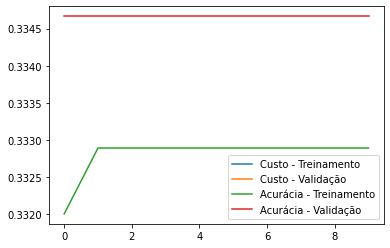

In [11]:
plt.plot(history.history['loss'], label='Custo - Treinamento')
plt.plot(history.history['val_loss'], label='Custo - Validação')
plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2eea57f0-66ce-43d0-a55e-57750385c9ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>